<a href="https://colab.research.google.com/github/amorelo01/IA_UdeA_AndresZ/blob/main/respuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore') 

In [ ]:
# Lectura de los archivos y asignacion de variables
train = pd.read_csv('https://drive.google.com/uc?id=1OIsB4KWW429YJuwTMirBh8Y0jUbWwHwl', index_col='id')
test = pd.read_csv('https://drive.google.com/uc?id=1m0CDh7iom9OohCpumZLsuM4qGixartab', index_col='id')
submission = pd.read_csv('https://drive.google.com/uc?id=19kVehCVH3L77Rw93kHznZ2btyhC5B-zO', index_col='id')

In [ ]:
display(train.head())

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,
0,A,I,A,B,B,BI,A,S,Q,A,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,A,I,A,A,E,BI,K,W,AD,F,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,A,K,A,A,E,BI,A,E,BM,L,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,A,K,A,C,E,BI,A,Y,AD,F,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,A,I,G,B,E,BI,C,G,Q,A,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [ ]:
# Codificación de las columnas categoricas "cat",
# se cambian de letras a números usando la función "LabelEncoder" de la sección "preprocessing" de scikit-learn
for c in train.columns:
    if train[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(train[c].values)
        test[c] = lbl.transform(test[c].values)
        
display(train.head())

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,8,0,1,1,33,0,44,54,0,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,0,8,0,0,4,33,8,48,3,5,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,0,10,0,0,4,33,0,30,38,9,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,0,10,0,2,4,33,0,50,3,5,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,0,8,6,1,4,33,2,32,54,0,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [ ]:
# Se separa el vector target (de 1s y 0s), en train
target = train.pop('target')
display(target.head)

<bound method NDFrame.head of id
0         0
1         0
2         0
3         0
4         1
         ..
499993    0
499995    0
499996    1
499997    0
499999    0
Name: target, Length: 300000, dtype: int64>

# PROCESADO

In [ ]:
# Se hace el <validation split>, con la función "train_test_split" de la sección "model_selection" de scikit-learn
# La idea es que apartir de la matriz de entrenamiento 'train' y usando los resultados de 'target', se saquen 4 sub-variables; 
# X_train, X_test, y_train, y_test. Es decir, 2 matrices X y 2 vectores y, todas las filas son aleatorias con la condicion que se corresponden los 'X' con los 'y' respectivos

X_train, X_test, y_train, y_test = train_test_split(train, target,
                                                    train_size=0.60) # el 60% de los datos van para 'X_train' y 'y_train', el 40% restante para las otras 2


In [ ]:
display(X_test.head)

<bound method NDFrame.head of         cat0  cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  ...  \
id                                                                  ...   
405788     0     8     0     0     5    33     7     8    23     0  ...   
408089     0     6    15     1     5    33     2     8    38     0  ...   
220601     0    12     0     0     5    33     0     0    45     5  ...   
215630     0    11     9     0     4     2     2     6    38     0  ...   
248008     0     8     0     0     4    33     2    36     4     0  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
309659     0     8     2     1     4    33     0    39     5     4  ...   
439886     0    10     5     2     5    33     0    30    38     0  ...   
223703     1     8     0     0     4    33     2    30    59     8  ...   
490848     0     8     2     0     5    33     0    46    59     0  ...   
103608     0     0     6     0     5     2     4     8    60     0  ..

In [ ]:
# La variable 'clf' será el bosque aleatorio de arboles de desición a incorporar, con un total de 200 arboles.
clf = RandomForestClassifier(n_estimators=200,  # Por defecto vienen 100
                             max_depth=7,       # Como hay tantas variables, se acota la profundidad de las ramas a 7, para que no se expandan hasta el infinito
                             n_jobs=-1)         # n_jobs=-1 significa que se debe utilizar todos los procesadores en paralelo

# Con .fit se incorporan las sub-variables de entrenamiento al bosque aleatorio
clf.fit(X_train, y_train)

# Con esto la variable 'clf' es el algoritmo entrenado

RandomForestClassifier(max_depth=7, n_estimators=200, n_jobs=-1)

In [ ]:
clf

RandomForestClassifier(max_depth=7, n_estimators=200, n_jobs=-1)

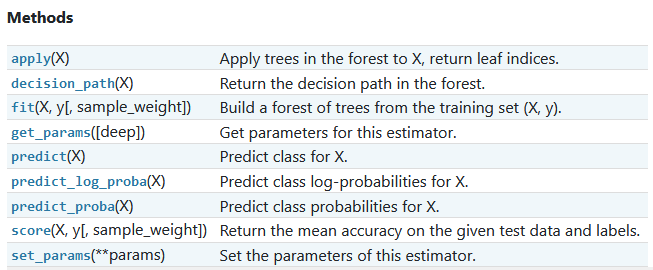

In [ ]:
y_pred = clf.predict_proba(X_test)
y_pred

array([[0.85578893, 0.14421107],
       [0.31574906, 0.68425094],
       [0.85008999, 0.14991001],
       ...,
       [0.83075927, 0.16924073],
       [0.89208573, 0.10791427],
       [0.86868346, 0.13131654]])

In [ ]:
# La función 'predict_proba' toma la media de probabilidad de predicción de cada arbol

y_pred = clf.predict_proba(X_test)[:, 1] # This grabs the positive class prediction
y_pred


array([0.14421107, 0.68425094, 0.14991001, ..., 0.16924073, 0.10791427,
       0.13131654])

In [ ]:

score = roc_auc_score(y_test, y_pred)

print(f'{score:0.5f}') # 0.87323 shows we're doing better than a dummy model

0.87201


In [ ]:
from sklearn.metrics import roc_curve, auc

# EJEMPLO DE GRAFICAR LA CURVA ROC:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

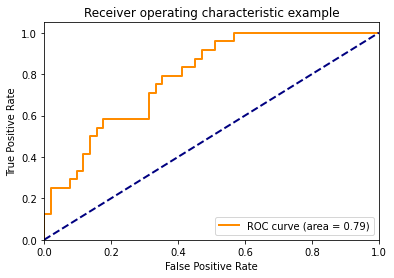

In [ ]:
plt.figure()
lw = 2

plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],)

plt.plot(
    [0, 1], 
    [0, 1], 
    color="navy", 
    lw=lw, 
    linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

# Sigue aquí lo que estaba en el foro:

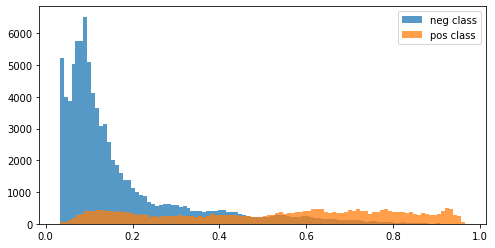

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(y_pred[np.where(y_test == 0)], bins=100, alpha=0.75, label='neg class')
plt.hist(y_pred[np.where(y_test == 1)], bins=100, alpha=0.75, label='pos class')
plt.legend()
plt.show()

In [ ]:
y_pred[np.where(y_test == 0)]

NameError: ignored

In [ ]:
clf = RandomForestClassifier(n_estimators=200, max_depth=7, n_jobs=-1)
clf.fit(train, target)
submission['target'] = clf.predict_proba(test)[:, 1]
# submission.to_csv('random_forest.csv')
submission

,target
id,
5,0.090796
6,0.523496
8,0.132924
9,0.114743
11,0.154999
...,...
499983,0.655808
499984,0.069068
499987,0.687857
